In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install tensorflow_datasets

  Obtaining dependency information for tensorflow_datasets from https://files.pythonhosted.org/packages/a1/73/7a9ed7935f6833d73b32f1e2a1210082f5ccb95445440b4e2b0f66ab7792/tensorflow_datasets-4.9.3-py3-none-any.whl.metadata
  Obtaining dependency information for array-record from https://files.pythonhosted.org/packages/93/8e/c6b646029a9c544ecd6806c6ea0efb67d0ba3300e1d68518f58d9774d3f0/array_record-0.4.1-py310-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for etils[enp,epath,etree]>=0.9.0 from https://files.pythonhosted.org/packages/0f/6a/d2aaebacf73d5da7126c632ec0d9dc2df99cc4bbd259bad48904a034fc1b/etils-1.5.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for tensorflow-metadata from https://files.pythonhosted.org/packages/41/23/3705c7139886c079ef4c0e3be56a5a1fb90e9ee413a4b7caaee0ee0ea6fe/tensorflow_metadata-1.14.0-py3-none-any.whl.m

In [4]:
import tensorflow_datasets as tfds

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [8]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [9]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test


In [14]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2716186854969616
Max: 244.94693302857712


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Optimizing at the Initialization Stage

In [20]:
from tensorflow.keras import layers

In [21]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [22]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 1s 36ms/step - loss: 2.3025 - accuracy: 0.1155 - val_loss: 2.3025 - val_accuracy: 0.1144
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 2.3025 - accuracy: 0.1163 - val_loss: 2.3025 - val_accuracy: 0.1144
Epoch 3/10
19/19 [==============================] - 0s 13ms/step - loss: 2.3024 - accuracy: 0.1163 - val_loss: 2.3024 - val_accuracy: 0.1144
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 2.3023 - accuracy: 0.1163 - val_loss: 2.3024 - val_accuracy: 0.1144
Epoch 5/10
19/19 [==============================] - 0s 15ms/step - loss: 2.3022 - accuracy: 0.1163 - val_loss: 2.3023 - val_accuracy: 0.1144
Epoch 6/10
19/19 [==============================] - 0s 15ms/step - loss: 2.3022 - accuracy: 0.1163 - val_loss: 2.3023 - val_accuracy: 0.1144
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 2.3021 - accuracy: 0.1163 - val_loss: 2.3022 - val_accuracy: 0.1144
Epoch 8/10
19

In [25]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 37ms/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3024 - val_accuracy: 0.1091
Epoch 2/10
19/19 [==============================] - 0s 16ms/step - loss: 2.3022 - accuracy: 0.1204 - val_loss: 2.3021 - val_accuracy: 0.1174
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 2.3020 - accuracy: 0.1180 - val_loss: 2.3019 - val_accuracy: 0.1154
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 2.3017 - accuracy: 0.1167 - val_loss: 2.3017 - val_accuracy: 0.1150
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 2.3015 - accuracy: 0.1164 - val_loss: 2.3015 - val_accuracy: 0.1147
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 2.3013 - accuracy: 0.1163 - val_loss: 2.3014 - val_accuracy: 0.1144
Epoch 7/10
19/19 [==============================] - 0s 11ms/step - loss: 2.3012 - accuracy: 0.1163 - val_loss: 2.3012 - val_accuracy: 0.1144
Epoch 8/10
19

In [26]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 2.3383 - accuracy: 0.1120 - val_loss: 2.3176 - val_accuracy: 0.1361
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 2.2861 - accuracy: 0.1450 - val_loss: 2.2699 - val_accuracy: 0.1649
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 2.2421 - accuracy: 0.1782 - val_loss: 2.2267 - val_accuracy: 0.1920
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 2.2000 - accuracy: 0.2051 - val_loss: 2.1837 - val_accuracy: 0.2134
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 2.1565 - accuracy: 0.2286 - val_loss: 2.1393 - val_accuracy: 0.2330
Epoch 6/10
19/19 [==============================] - 0s 13ms/step - loss: 2.1104 - accuracy: 0.2500 - val_loss: 2.0923 - val_accuracy: 0.2520
Epoch 7/10
19/19 [==============================] - 0s 15ms/step - loss: 2.0608 - accuracy: 0.2695 - val_loss: 2.0419 - val_accuracy: 0.2709
Epoch 8/10
19

In [27]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 35ms/step - loss: 2.4581 - accuracy: 0.1260 - val_loss: 2.3461 - val_accuracy: 0.1702
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 2.2530 - accuracy: 0.2066 - val_loss: 2.1959 - val_accuracy: 0.2407
Epoch 3/10
19/19 [==============================] - 0s 15ms/step - loss: 2.1205 - accuracy: 0.2786 - val_loss: 2.0850 - val_accuracy: 0.3115
Epoch 4/10
19/19 [==============================] - 0s 15ms/step - loss: 2.0124 - accuracy: 0.3399 - val_loss: 1.9869 - val_accuracy: 0.3612
Epoch 5/10
19/19 [==============================] - 0s 15ms/step - loss: 1.9128 - accuracy: 0.3857 - val_loss: 1.8926 - val_accuracy: 0.4027
Epoch 6/10
19/19 [==============================] - 0s 19ms/step - loss: 1.8152 - accuracy: 0.4218 - val_loss: 1.7974 - val_accuracy: 0.4328
Epoch 7/10
19/19 [==============================] - 0s 16ms/step - loss: 1.7168 - accuracy: 0.4566 - val_loss: 1.6995 - val_accuracy: 0.4671
Epoch 8/10
19

Text(0, 0.5, 'Validation Accuracy')

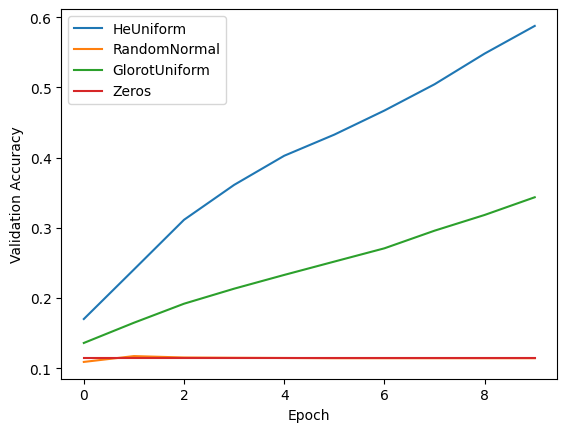

In [29]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [30]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [31]:
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [32]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 2s 38ms/step - loss: 2.0880 - accuracy: 0.2979 - val_loss: 2.2977 - val_accuracy: 0.1579
Epoch 2/10
19/19 [==============================] - 0s 25ms/step - loss: 1.5025 - accuracy: 0.5263 - val_loss: 2.2918 - val_accuracy: 0.1505
Epoch 3/10
19/19 [==============================] - 0s 20ms/step - loss: 1.1877 - accuracy: 0.6488 - val_loss: 2.2824 - val_accuracy: 0.1872
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 0.9788 - accuracy: 0.7251 - val_loss: 2.2679 - val_accuracy: 0.2678
Epoch 5/10
19/19 [==============================] - 0s 19ms/step - loss: 0.8391 - accuracy: 0.7678 - val_loss: 2.2475 - val_accuracy: 0.3179
Epoch 6/10
19/19 [==============================] - 0s 20ms/step - loss: 0.7428 - accuracy: 0.7956 - val_loss: 2.2188 - val_accuracy: 0.3581
Epoch 7/10
19/19 [==============================] - 0s 17ms/step - loss: 0.6710 - accuracy: 0.8171 - val_loss: 2.1814 - val_accuracy: 0.4102
Epoch 8/10
19

In [33]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 2s 38ms/step - loss: 2.4566 - accuracy: 0.1700 - val_loss: 2.2533 - val_accuracy: 0.2310
Epoch 2/10
19/19 [==============================] - 0s 19ms/step - loss: 1.9806 - accuracy: 0.3372 - val_loss: 2.0360 - val_accuracy: 0.3451
Epoch 3/10
19/19 [==============================] - 0s 21ms/step - loss: 1.7069 - accuracy: 0.4411 - val_loss: 1.8377 - val_accuracy: 0.4429
Epoch 4/10
19/19 [==============================] - 0s 19ms/step - loss: 1.5197 - accuracy: 0.5170 - val_loss: 1.6583 - val_accuracy: 0.5210
Epoch 5/10
19/19 [==============================] - 0s 18ms/step - loss: 1.3790 - accuracy: 0.5759 - val_loss: 1.4991 - val_accuracy: 0.5910
Epoch 6/10
19/19 [==============================] - 0s 19ms/step - loss: 1.2632 - accuracy: 0.6304 - val_loss: 1.3602 - val_accuracy: 0.6451
Epoch 7/10
19/19 [==============================] - 0s 18ms/step - loss: 1.1669 - accuracy: 0.6733 - val_loss: 1.2383 - val_accuracy: 0.6890
Epoch 8/10
19

In [34]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 45ms/step - loss: 1.1424 - accuracy: 0.6469 - val_loss: 2.2988 - val_accuracy: 0.1507
Epoch 2/10
19/19 [==============================] - 0s 21ms/step - loss: 0.5070 - accuracy: 0.8613 - val_loss: 2.2938 - val_accuracy: 0.1624
Epoch 3/10
19/19 [==============================] - 0s 20ms/step - loss: 0.3793 - accuracy: 0.8979 - val_loss: 2.2870 - val_accuracy: 0.2586
Epoch 4/10
19/19 [==============================] - 0s 19ms/step - loss: 0.3157 - accuracy: 0.9154 - val_loss: 2.2781 - val_accuracy: 0.2852
Epoch 5/10
19/19 [==============================] - 0s 19ms/step - loss: 0.2750 - accuracy: 0.9272 - val_loss: 2.2662 - val_accuracy: 0.3169
Epoch 6/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2448 - accuracy: 0.9357 - val_loss: 2.2502 - val_accuracy: 0.3487
Epoch 7/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2226 - accuracy: 0.9414 - val_loss: 2.2284 - val_accuracy: 0.3881
Epoch 8/10
19

In [35]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 38ms/step - loss: 0.9022 - accuracy: 0.7275 - val_loss: 2.1199 - val_accuracy: 0.3681
Epoch 2/10
19/19 [==============================] - 0s 24ms/step - loss: 0.2743 - accuracy: 0.9205 - val_loss: 1.9501 - val_accuracy: 0.4282
Epoch 3/10
19/19 [==============================] - 0s 20ms/step - loss: 0.1808 - accuracy: 0.9472 - val_loss: 1.7948 - val_accuracy: 0.5798
Epoch 4/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1347 - accuracy: 0.9604 - val_loss: 1.6235 - val_accuracy: 0.7299
Epoch 5/10
19/19 [==============================] - 0s 21ms/step - loss: 0.1055 - accuracy: 0.9692 - val_loss: 1.4542 - val_accuracy: 0.7656
Epoch 6/10
19/19 [==============================] - 0s 21ms/step - loss: 0.0861 - accuracy: 0.9753 - val_loss: 1.2822 - val_accuracy: 0.8145
Epoch 7/10
19/19 [==============================] - 0s 20ms/step - loss: 0.0743 - accuracy: 0.9784 - val_loss: 1.0705 - val_accuracy: 0.8489
Epoch 8/10
19

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3670 - accuracy: 0.8912 - val_loss: 0.2293 - val_accuracy: 0.9425
Epoch 2/2000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2095 - accuracy: 0.9374 - val_loss: 0.2031 - val_accuracy: 0.9435
Epoch 3/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1671 - accuracy: 0.9498 - val_loss: 0.2121 - val_accuracy: 0.9497
Epoch 4/2000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1395 - accuracy: 0.9573 - val_loss: 0.1903 - val_accuracy: 0.9518
Epoch 5/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9616 - val_loss: 0.1618 - val_accuracy: 0.9598
Epoch 6/2000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9662 - val_loss: 0.1554 - val_accuracy: 0.9639
Epoch 7/2000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1006 - accuracy: 0.9689 - val_loss: 0.1525 -